In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Q1.

In [12]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [14]:
df_age = df.replace({"연령대코드(5세단위)": age_code})
df_new = pd.pivot_table(df_age, index="연령대코드(5세단위)", values="허리둘레", aggfunc="describe")
df_new2 = df_new.reset_index()
df_final = df_new2.rename(columns = {'연령대코드(5세단위)' : '연령대'})
df_final

,연령대,25%,50%,75%,count,max,mean,min,std
0,20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
1,25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
2,30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
3,35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
4,40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
5,45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
6,50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
7,55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
8,60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176
9,65~69세,78.0,83.5,89.0,53624.0,129.0,83.588500,50.0,8.443542


Q2.

In [15]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


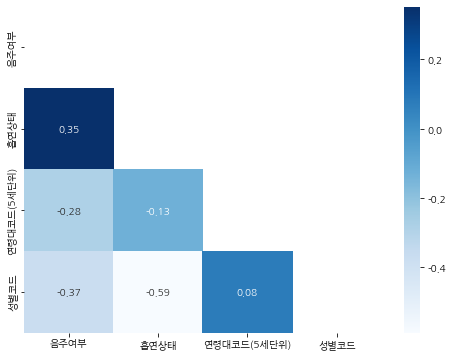

In [26]:
df_get = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']]
df_corr = df_get.corr()
mask = np.triu(np.ones_like(df_corr, dtype = np.bool))
plt.figure(figsize = (8,6))
sns.heatmap(df_corr, annot = True, fmt =".2f", cmap = "Blues", mask = mask)

Q3.

In [33]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}
df_copy = df.copy()
df_copy['흡연상태'].replace(smoke, inplace = True)
df_copy['음주여부'].replace(drink, inplace = True)
df_copy

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,끊음,마심,0,NaN,NaN,NaN,NaN,NaN,20181126


In [35]:
pd.crosstab(df_copy['음주여부'], df_copy['흡연상태'])

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


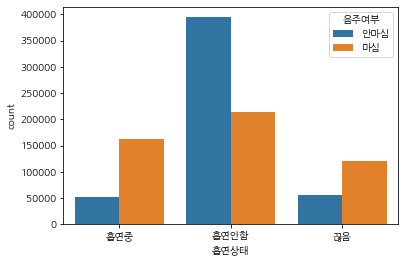

In [36]:
sns.countplot(data = df_copy, x = '흡연상태', hue = '음주여부')

Q4.

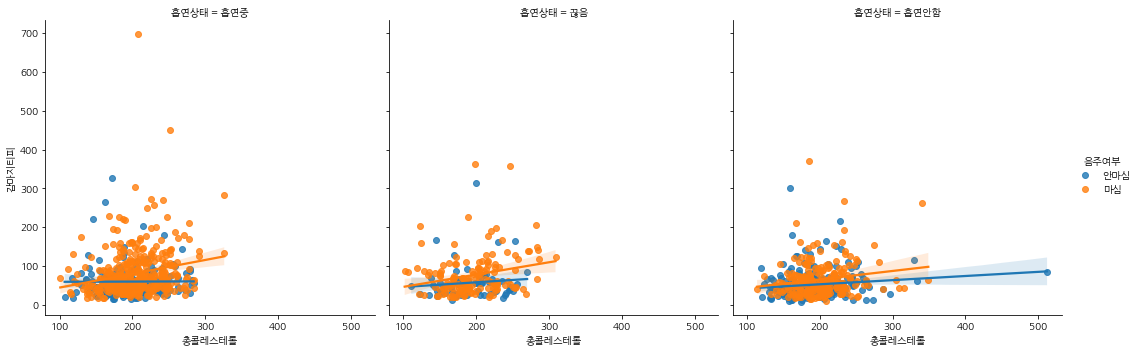

In [37]:
df_fat = df_copy[df_copy['체중(5Kg 단위)'] >= 120]
sns.lmplot(data = df_fat, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

Q5.

In [38]:
df_copy2 = df.copy()
df_copy2['흡연상태'].replace(smoke, inplace = True)
df_copy2['음주여부'].replace(drink, inplace = True)
df_copy2['연령대코드(5세단위)'].replace(age_code, inplace = True)
df_copy2.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


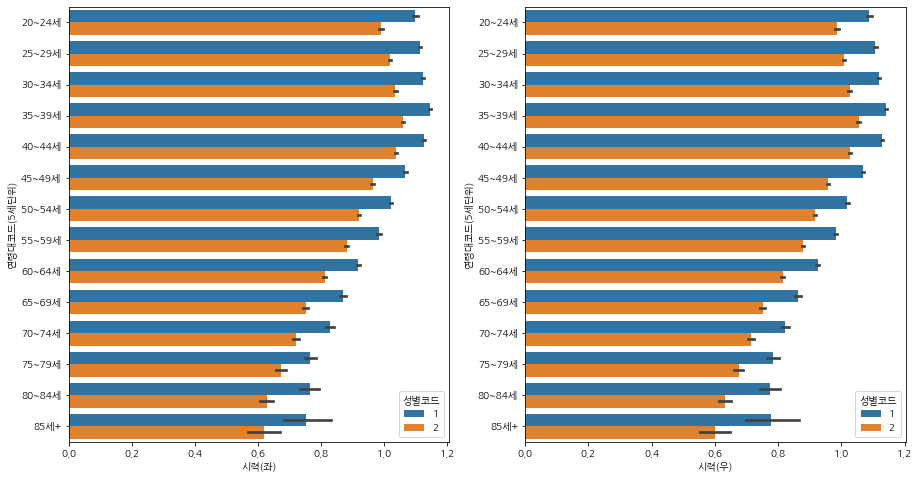

In [49]:
df_copy3 = df_copy2[(df_copy2['시력(좌)'] < 9.9) | (df_copy2['시력(우)'] < 9.9)]
df_copy4 = df_copy3.sort_values("연령대코드(5세단위)")
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(data = df_copy4, x = '시력(좌)', y = '연령대코드(5세단위)', hue = '성별코드', ax = axes[0])
sns.barplot(data = df_copy4, x = '시력(우)', y = '연령대코드(5세단위)', hue = '성별코드', ax = axes[1])
plt.show()